In [1]:
from sympy import *
%matplotlib inline


init_printing(use_latex=True)

# Markdown Tutorial

## Markdown Cells

Cells which contain text are called "markdown" cells. In markdown cells acutally use a text formatting language called markdown. To make a cell into a markdown cell, choose the option "Markdown" from the drop down menu on the tool bar above. 

Markdown cells are run in the same way as code cells: by pressing ```shift + enter```. Once a markdown cell has been run, it appears as plain text. To edit a markdown cell, double click on it.

### Headings
Markdown cells can contain headings and subheadings to keep writing organized. To create a heading, type from one to six ```#```s at the beginning of a line followed by a space and the name of your heading. Jupyter will automatically change the font size of the heading and turn it blue for visability. 

Markdown has 6 different levels of headings. Below are some examples of different headings. The cell below contains the largest of these headings. Double click on this cell see how these different were created.


```
# Heading 1
## Heading 2
##### Heading 5
```

# Heading 1
## Heading 2
##### Heading 5

## Emphasis: 


- Bold:
```
    __string__ or **string** 
```

 gives
 
 __string__ or **string** 
 
 
- Italic: 

```
    _string_ or *string*
```

gives

_string_ or *string*

### LaTeX
To embed LaTeX formatting in a markdown cell, surround the command with either ```$``` or ```$$```. The single dollar sign puts it inline witht the text, the the double dollar sign centers it below the text. Here is an example of a centered LaTeX command:

$$F(x) = \int_{0}^{\infty} e^{-x} dx$$


See more at http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Typesetting%20Math%20Using%20MathJax.ipynb

## GitHub flavored markdown
The Notebook webapp supports Github flavored markdown meaning that you can use triple backticks for code blocks:


    ```python
    print "Hello World"
    ```

gives

```python
print "Hello World"
```

and 

    ```javascript
    console.log("Hello World")
    ```
gives

```javascript
console.log("Hello World")
```

## Model:

- product equals aggregate demand, $Y = C + I +G$; 

- consumption function, $C = \bar C + c(Y−T)$; 

- investment function, $I = \bar I − bR$; 


- public spending function, $G = \bar G$; 

- income taxes function, $T = \bar T$; 

- monetary equilibrium, $M/P = kY − hR$; 

- money supply function, $M = \bar M$.

## Endogenous variables: 

- product, $Y$;

- consumption, $C$; 

- investment, $I$; 

- interest rate, $R$.

In [2]:
Y, C, I, R, P = symbols('Y C I R P')

## Exogenous variables: 

- government/public spending, $\bar G$; 

- independent/autonomous consumption, $\bar C$; 

- independent/autonomous investment, $\bar I$; 

- income taxes, $\bar T$;

- money supply, $\bar M$; 

- price level (fixed), $\bar P$.

In [3]:
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = symbols( 'Gbar Cbar Ibar Tbar Mbar Pbar')

## Parameters:
- $c$ is the propensity to consume, $0 < c < 1$; 

- $b > 0$ is the interest sensitivity of investment; 

- $k > 0$ is the output sensitivity of the demand for money; 

- $h > 0$ is the interest sensitivity of the demand for money.



In [4]:
c, b, k, h = symbols('c b k h', positive = True)

## IS curve

The IS curve shows the continuum of combinations of the interest and production level at which there is equilibrium in the goods and services market:

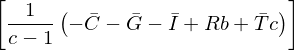

In [5]:
solve( Y - (Cbar + c*(Y-Tbar) + Ibar - b*R + Gbar),Y)

In [6]:
aggregate_demand = Eq(Y, C+I+Gbar)
aggregate_demand

In [ ]:
consumption_function=Eq(C,Cbar+c*(Y-Tbar))
consumption_function

In [ ]:
investment_function=Eq(  I,Ibar-b*R)
investment_function

In [ ]:
solve( [aggregate_demand,consumption_function,investment_function],[Y,C,I])

## IS−LM model 

In [ ]:
monetary_equilibrium= Eq( Mbar/Pbar,k*Y-h*R) ;
monetary_equilibrium

In [ ]:
solve([monetary_equilibrium],[R])

## IS−LM model 

### A Closed Economy in the short−medium run

In [ ]:
# parameters 
c = 0.63  # marginal propensity to consume 

b = 1500 # s e n s ib i l i ty of the investment to the in te res t rate 

k = 0.6  # s e n s ib i l i ty of the money demand to the product 

h = 2700 # s e n s ib i l i ty of the money demand to the in te res t rate

In [ ]:
# policy exogenous variables 
C_bar = 55 # autonomous consumption 

I_bar = 75 # autonomous investment 

G_bar = 200 #government spending 

T_bar = 110 # tax on income 

M_bar = 200 # money supply 

P_bar = 1 #price leve l ( fixed in the short−run )

In [ ]:
# endogenous variables % Y, product % C, consumption % I , investment % R, in te res t rate

import numpy as np
# matrix representation of the model : Ax=d 
#% A, coe ffic ien t matrix % Y C I R 
A = np.matrix([ [1, -1, -1, 0], # Y=C+ I+G 
     [-c, 1, 0, 0], # C=C_bar+c(Y−T) 
     [0, 0, 1, b], # I=I_bar−bR 
     [k, 0, 0, -h] ]) # M/P=kY−hR


In [ ]:
A

In [ ]:
# x = [Y;C; I ;R] , vector of the endogeneous variables 
#  d, vector of the exogeneous variables 

d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )

In [ ]:
import pprint
import scipy
import scipy.linalg   # SciPy Linear Algebra Library

In [ ]:
# compute the endogenous variables 
P, L ,U = scipy.linalg.lu(A) # LU factoriza tion 



In [ ]:
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linea r system

In [ ]:
#np.set_printoptions(precision=3)

In [ ]:
# x = [Y;C; I ;R] , vector of the endogeneous variables 
x


In [ ]:
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 200; T = 110; M = 200; P = 1     \
      \nproduct, Y = {0:.2f}，\
      \nconsumption,C= {1:.2f}, \
      \ninvestment,I =  {2:.2f}，\
      \ninterest rate (%),R = {3:.2f}".format(x[0],x[1],x[2],x[3]*100  ))

In [ ]:
# plot the so lution : IS−LM diagram (R against Y) 

# generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

Y = np.linspace(0.95*x[0],1.05*x[0], num=100) 
    
# IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

C = C_bar+c*(Y-T_bar ) 

I =Y-C-G_bar 

IS=( I_bar-I ) / b  

# LM: M_bar/P_bar=kY−hR expressed in terms of R 

LM = 1/h*( k*Y-M_bar / P_bar ) 

In [ ]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [ ]:
plt.figure(num=1)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=4.0, linestyle='-', label='LM line')
plt.xlim((500, 560))
plt.ylim((0.036, 0.05))
plt.legend()

## Fiscal policy: government/public authorities decrease taxes from 110 to 100

shock: new value for T = 100.00

In [ ]:
T_bar = 100 # tax on income 

# x = [Y;C; I ;R] , vector of the endogeneous variables 
#  d, vector of the exogeneous variables 

d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )

In [ ]:
# compute the endogenous variables 
P, L ,U = scipy.linalg.lu(A) # LU factoriza tion 

new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linea r system

In [ ]:
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nshock: new value for T = 100.00\
      \nexogenous variables: \nG = 200; T = 100; M = 200; P = 1     \
      \nproduct, Y = {0:.2f}，\
      \nconsumption,C= {1:.2f}, \
      \ninvestment,I =  {2:.2f}，\
      \ninterest rate (%),R = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))

In [ ]:
# plot the solution : IS−LM diagram (R against Y) 

# generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 
    
# IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

new_C = C_bar+c*(new_Y-T_bar ) 

new_I =new_Y-new_C-G_bar 

new_IS=( I_bar-new_I ) / b  

# LM: M_bar/P_bar=kY−hR expressed in terms of R 

new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

In [ ]:
plt.figure(num=2)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((500, 560))
plt.ylim((0.036, 0.054))
plt.legend()

## Fiscal policy: government/public authorities increase public spending from 200 to 210

shock: new value for G = 210.00

In [ ]:
G_bar = 210 #government spending 
T_bar = 110 # tax on income 

# x = [Y;C; I ;R] , vector of the endogeneous variables 
#  d, vector of the exogeneous variables 

d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )

In [ ]:
# compute the endogenous variables 
P, L ,U = scipy.linalg.lu(A) # LU factoriza tion 

new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linea r system

print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nshock: new value for G = 210.00\
      \nexogenous variables: \nG = 210; T = 100; M = 200; P = 1     \
      \nproduct, Y = {0:.2f}，\
      \nconsumption,C= {1:.2f}, \
      \ninvestment,I =  {2:.2f}，\
      \ninterest rate (%),R = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))

In [ ]:
# plot the so lution : IS−LM diagram (R against Y) 

# generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 
    
# IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

new_C = C_bar+c*(new_Y-T_bar ) 

new_I =new_Y-new_C-G_bar 

new_IS=( I_bar-new_I ) / b  

# LM: M_bar/P_bar=kY−hR expressed in terms of R 

new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

plt.figure(num=3)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((500, 570))
plt.ylim((0.036, 0.054))
plt.legend()

## Monetary policy: monetary authorities decrease the money supply from 200 to 180

shock: new value for M = 180.00

In [ ]:
G_bar = 200 #government spending 
T_bar = 110 # tax on income 
M_bar = 180.00

# x = [Y;C; I ;R] , vector of the endogeneous variables 
#  d, vector of the exogeneous variables 

d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )

In [ ]:
# compute the endogenous variables 
P, L ,U = scipy.linalg.lu(A) # LU factoriza tion 

new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linea r system

print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nshock: new value for M = 180.00\
      \nexogenous variables: \nG = 200; T = 100; M = 1800; P = 1     \
      \nproduct, Y = {0:.2f}，\
      \nconsumption,C= {1:.2f}, \
      \ninvestment,I =  {2:.2f}，\
      \ninterest rate (%),R = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))

In [ ]:
# plot the so lution : IS−LM diagram (R against Y) 

# generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 
    
# IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

new_C = C_bar+c*(new_Y-T_bar ) 

new_I =new_Y-new_C-G_bar 

new_IS=( I_bar-new_I ) / b  

# LM: M_bar/P_bar=kY−hR expressed in terms of R 

new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

plt.figure(num=4)
l1 = plt.plot(Y, IS , '--b', label='IS line')
l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
plt.xlim((500, 560))
plt.ylim((0.036, 0.054))
plt.legend()

## IS-LM Function




In [ ]:
def ISLM(new_G_bar = 200, new_T_bar = 110, new_M_bar = 180.00,newTitle =r'Expansion of money supply ($\bar M$ increases 20%)'):
    """ A function plot change of IS-LM Model
    # parameters 
    c = 0.63  # marginal propensity to consume 

    b = 1500 # s e n s ib i l i ty of the investment to the in te res t rate 

    k = 0.6  # s e n s ib i l i ty of the money demand to the product 

    h = 2700 # s e n s ib i l i ty of the money demand to the in te res t rate

    """
    # parameters 
    c = 0.63  # marginal propensity to consume 

    b = 1500 # s e n s ib i l i ty of the investment to the in te res t rate 

    k = 0.6  # s e n s ib i l i ty of the money demand to the product 

    h = 2700 # s e n s ib i l i ty of the money demand to the in te res t rate
    
    
    # policy exogenous variables 
    C_bar = 55 # autonomous consumption 

    I_bar = 75 # autonomous investment 

    G_bar = 200 #government spending 

    T_bar = 110 # tax on income 

    M_bar = 200 # money supply 

    P_bar = 1 #price leve l ( fixed in the short−run )
    
    # plot the so lution : IS−LM diagram (R against Y) 

    # generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

    Y = np.linspace(0.95*x[0],1.05*x[0], num=100) 

    # IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

    C = C_bar+c*(Y-T_bar ) 

    I =Y-C-G_bar 

    IS=( I_bar-I ) / b  

    # LM: M_bar/P_bar=kY−hR expressed in terms of R 

    LM = 1/h*( k*Y-M_bar / P_bar ) 
    
    # policy shock
    G_bar = new_G_bar #government spending 
    T_bar = new_T_bar # tax on income 
    M_bar = new_M_bar # money supply 

    # x = [Y;C; I ;R] , vector of the endogeneous variables 
    #  d, vector of the exogeneous variables 

    d = np.array([ G_bar , C_bar - c*T_bar , I_bar , M_bar/P_bar ] )
    
    # compute the endogenous variables 
    P, L ,U = scipy.linalg.lu(A) # LU factoriza tion 

    new_x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linea r system

    print(" IS-LM model: closed economy \
          \n-----------------------------------------------------------\
          \nexogenous variables: \nG = 200; T = 100; M = 1800; P = 1     \
          \nproduct, Y = {0:.2f}，\
          \nconsumption,C= {1:.2f}, \
          \ninvestment,I =  {2:.2f}，\
          \ninterest rate (%),R = {3:.2f}".format(new_x[0],new_x[1],new_x[2],new_x[3]*100  ))
    # plot the so lution : IS−LM diagram (R against Y) 

    # generate a grid on Y; in th is case , since th is is a line % only 2 points would have been required 

    new_Y = np.linspace(0.95*new_x[0],1.05*new_x[0], num=100) 

    # IS : I=Y−C−G and I=I_bar−bR expressed in terms of R 

    new_C = C_bar+c*(new_Y-T_bar ) 

    new_I =new_Y-new_C-G_bar 

    new_IS=( I_bar-new_I ) / b  

    # LM: M_bar/P_bar=kY−hR expressed in terms of R 

    new_LM = 1/h*( k*new_Y-M_bar / P_bar ) 

    plt.figure()
    l1 = plt.plot(Y, IS , '--b', label='IS line')
    l2 = plt.plot(Y, LM,  color='red', linewidth=2.0, linestyle='-', label='LM line')
    l1 = plt.plot(new_Y, new_IS , '--b', linewidth=4.0, label='new IS line')
    l2 = plt.plot(new_Y, new_LM,  color='red', linewidth=4.0, linestyle='-', label='new LM line')
    plt.xlim((500, 560))
    plt.ylim((0.036, 0.054))
    plt.title(newTitle)
    plt.legend()
    
    
    
    

In [ ]:
ISLM(new_G_bar = 200, new_T_bar = 110, new_M_bar = 220.00, newTitle= r'Expansion of money supply ($\bar M$ increases 20%)')